In [17]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [78]:
#Data sourced from kaggle: https://www.kaggle.com/c/digit-recognizer
train = pd.read_csv(r"C:\Users\Jameson.T.Nunnally\Desktop\digit\train.csv")
test = pd.read_csv(r"C:\Users\Jameson.T.Nunnally\Desktop\digit\test.csv")

In [79]:
#check that it was loaded properly
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
#Seperate labels from images
Y_train=train["label"]
Y_train.head()
X_train=train.drop(labels=["label"],axis=1)


In [81]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [82]:

# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [83]:

# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [85]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

In [86]:
X_train.shape

(42000, 28, 28, 1)

In [143]:
#set random seed for reproducable results
random_seed = 9

In [144]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=random_seed)

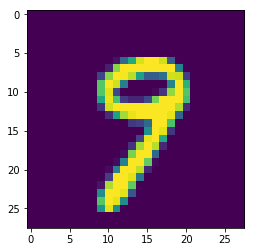

In [145]:
#Example of handwritten digit
g = plt.imshow(X_train[2][:,:,0])

In [148]:
#Create our kerasmodel
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28,1)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [153]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [154]:
model.fit(X_train, Y_train, epochs=30)

Epoch 1/30
13762/13762 [==============================] - 1s 105us/step - loss: 0.0750 - acc: 0.9744
Epoch 2/30
13762/13762 [==============================] - 1s 71us/step - loss: 0.0371 - acc: 0.9881
Epoch 3/30
13762/13762 [==============================] - 1s 69us/step - loss: 0.0273 - acc: 0.9912
Epoch 4/30
13762/13762 [==============================] - 1s 62us/step - loss: 0.0206 - acc: 0.9938
Epoch 5/30
13762/13762 [==============================] - 1s 59us/step - loss: 0.0171 - acc: 0.9948
Epoch 6/30
13762/13762 [==============================] - 1s 60us/step - loss: 0.0131 - acc: 0.9962
Epoch 7/30
13762/13762 [==============================] - 1s 63us/step - loss: 0.0105 - acc: 0.9970
Epoch 8/30
13762/13762 [==============================] - 1s 62us/step - loss: 0.0082 - acc: 0.9978
Epoch 9/30
13762/13762 [==============================] - 1s 61us/step - loss: 0.0068 - acc: 0.9981
Epoch 10/30
13762/13762 [==============================] - 1s 59us/step - loss: 0.0054 - acc: 0.998

In [155]:
test_loss, test_acc = model.evaluate(X_val, Y_val)

print('Test accuracy:', test_acc)

3441/3441 [==============================] - 0s 90us/step
Test accuracy: 0.9934321410501464


In [126]:
predictions = model.predict(test)

In [127]:
predictions[0]

array([5.0770952e-05, 5.6115379e-10, 9.9991536e-01, 1.5590314e-05,
       1.3269221e-09, 1.4533209e-07, 4.7000700e-07, 5.0176507e-08,
       1.7285845e-05, 3.0370398e-07], dtype=float32)

In [128]:
np.argmax(predictions[0])

2

In [129]:
results=model.predict(test)

In [130]:
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [131]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv(r"C:\Users\Jameson.T.Nunnally\Desktop\digit\jims5th.csv",index=False)